# Equilibrio Labores Hogar Colombia
## - Gran Encuesta Integrada de Hogares - GEIH -

Archivos :
- Area - Otras actividades y ayudas en la semana

Columnas : <br>
P7480S3 : Realiza Oficions en su Hogar? (1= si 2=no ) <br>
P7480S3A1 : Cuantas Horas a la Semana? <br>
P7480S5 : Cuidar o Atender Ninos <br>
P7480S5A1 : Cuantas Horas a la Semana? <br>

- Cabecera - Características generales (Personas)

Columnas : <br>
P6020 : Sexo (1 = Hombre, 2 = Mujer) <br>
P6040 : Edad <br>
P3246 : Usted se considera Pobre? (1= si 2=no ) <br>



#### Source Data
2020 : http://microdatos.dane.gov.co/index.php/catalog/659/get_microdata <br>
2019 : http://microdatos.dane.gov.co/index.php/catalog/599/get_microdata

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Data Import


In [2]:
areacols = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN','P7480S3','P7480S3A1','P7480S5','P7480S5A1','fex_c_2011']
df_19area = pd.read_csv("./dataset/2019Noviembre.csv/area - Otras actividades y ayudas en la semana.csv",sep=';', usecols=areacols)
df_20area = pd.read_csv("./dataset/2020Noviembre.csv/20Area - Otras actividades y ayudas en la semana.csv",sep=';', usecols=areacols)

cabecols = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN','P6020','P6040']
df_19cabeceras = pd.read_csv("./dataset/2019Noviembre.csv/Cabecera - Características generales (Personas).csv",sep=';', usecols=cabecols)
df_20cabeceras = pd.read_csv("./dataset/2020Noviembre.csv/Cabecera - Características generales (Personas).csv",sep=';', usecols=cabecols)

key=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']

### 1.2 Data Preparation

In [3]:
df_2019 = pd.merge(df_19area, df_19cabeceras,on=key, how='inner')
df_2020 = pd.merge(df_20area, df_20cabeceras,on=key, how='inner')

df_2019['P7480S3A1'] = df_2019['P7480S3A1'].replace(' ',0, regex=True)
df_2019['P7480S5A1'] = df_2019['P7480S5A1'].replace(' ',0, regex=True)
df_2019['P7480S3A1']=df_2019['P7480S3A1'].astype(float)
df_2019['P7480S5A1']=df_2019['P7480S5A1'].astype(float)


df_2020['fex_c_2011'] = df_2020['fex_c_2011'].replace(',' , '.', regex=True)
df_2020['fex_c_2011']=df_2020['fex_c_2011'].astype(float)
df_2020['P7480S3A1'] = df_2020['P7480S3A1'].replace(' ',0, regex=True)
df_2020['P7480S5A1'] = df_2020['P7480S5A1'].replace(' ',0, regex=True)
df_2020['P7480S3A1']=df_2020['P7480S3A1'].astype(float)
df_2020['P7480S5A1']=df_2020['P7480S5A1'].astype(float)
 

### 1.3 General Functions


In [4]:
#FUNCIONES 
def GrupoEta(dataframe_name):
    newDF=dataframe_name.copy()
    newDF.loc[(newDF.P6040 <= 5),  'GrupoEta'] = 'PRIMERA_INFANCIA'
    newDF.loc[(newDF.P6040 >= 6) & (newDF.P6040 <= 11),  'GrupoEta'] = 'INFANCIA'
    newDF.loc[(newDF.P6040 >= 12) & (newDF.P6040 <= 18),  'GrupoEta'] = 'ADOLESCENCIA'
    newDF.loc[(newDF.P6040 >= 19) & (newDF.P6040 <= 26),  'GrupoEta'] = 'JUVENTUD'
    newDF.loc[(newDF.P6040 >= 27) & (newDF.P6040 <= 59),  'GrupoEta'] = 'ADULTEZ'
    newDF.loc[(newDF.P6040 >= 50),  'GrupoEta'] = 'VEJEZ'
    dataframe_name=newDF.copy()
    return (dataframe_name)

def replaceSex(dataframe_name):
    dataframe_name.loc[(dataframe_name.P6020 == 1),  'Sexo'] = 'Hombre'
    dataframe_name.loc[(dataframe_name.P6020 == 2),  'Sexo'] = 'Mujer'
    
    return (dataframe_name)
    


In [20]:
df_2019["horas_aux"] = df_2019["P7480S3A1"] * df_2019["fex_c_2011"]
df_2020["horas_aux"] = df_2020["P7480S3A1"] * df_2020["fex_c_2011"]

df_2019=GrupoEta(df_2019)
df_2020=GrupoEta(df_2020)

df_2019=replaceSex(df_2019)
df_2020=replaceSex(df_2020)

In [6]:
df_2020.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P7480S3,P7480S3A1,P7480S5,P7480S5A1,fex_c_2011,P6020,P6040,horas_aux,GrupoEta,Sexo
0,5272752,1,1,1,29.0,2,0.0,497.909418,1,47,14439.373128,ADULTEZ,Hombre
1,5272752,1,2,1,10.0,2,0.0,497.909418,2,44,4979.094182,ADULTEZ,Mujer
2,5272752,1,3,1,9.0,2,0.0,497.909418,1,17,4481.184764,ADOLESCENCIA,Hombre
3,5272752,1,4,1,22.0,1,1.0,497.909418,1,69,10954.007200,VEJEZ,Hombre
4,5272753,1,1,1,28.0,1,10.0,600.637876,1,67,16817.860516,VEJEZ,Hombre


In [19]:
#sns.pairplot(data = df_2019, vars=['P6020','P6040','P7480S3','P7480S3A1'])
#plt.show()

df_2020.groupby(['P6020'])['P7480S3A1'].describe()

,count,mean,std,min,25%,50%,75%,max
P6020,,,,,,,,
1,11203.0,5.860752,7.376289,0.0,0.0,3.0,10.0,70.0
2,13373.0,18.684214,12.711064,0.0,8.0,18.0,28.0,98.0


In [41]:
meanfex = df_2020.groupby(['P6020'])['fex_c_2011'].mean()
print(df_2020.groupby(['P6020'])['horas_aux'].mean() / meanfex)

P6020
1     6.153653
2    18.304690
dtype: float64


- En Promedio durante Noviembre 2020 los hombres dedicaron 6.15Horas a labores del hogar vs 18.3 Horas dedicadas por las mujeres.

- No Existe diferencia relevante en la cantidad de horas utilizadas por los hombres en labores de hogar cuando se discrimina por grupo etario.

- No Existe diferencia relevante en la cantidad de horas utilizadas por los hombres en el cuidado de ninios cuando se discrimina por grupo etario.


### Plots Noviembre 2019

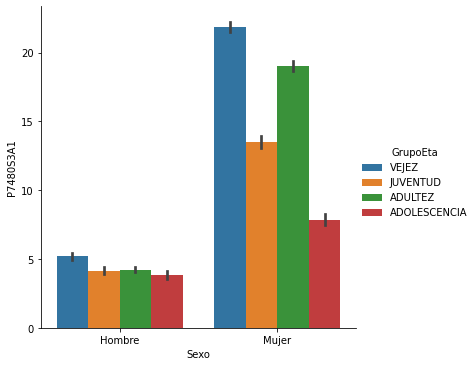

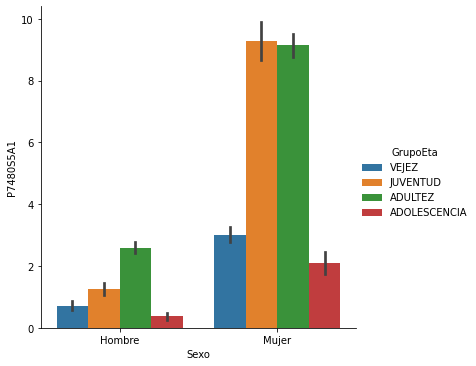

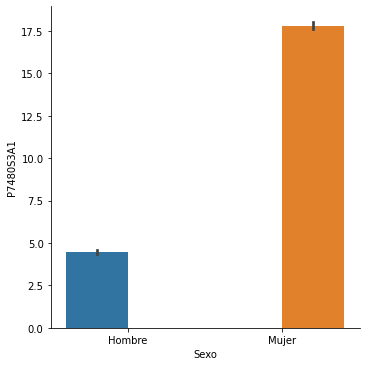

In [28]:
#Labores Hogar Noviembre 2019
sns.catplot(x="Sexo", y="P7480S3A1", hue="GrupoEta", kind="bar", data=df_2019)

# Cuidado Infantes 
sns.catplot(x="Sexo", y="P7480S5A1", hue="GrupoEta", kind="bar", data=df_2019)

#Cuidado Infates por Sexo
sns.catplot(x="Sexo", y="P7480S3A1", hue="Sexo", kind="bar", data=df_2019)

In [44]:
#Antes Pandemia
print(df_2019.groupby('Sexo')['P7480S3A1'].mean())
print('Cuidado Infantes 2019',df_2019.groupby('Sexo')['P7480S5A1'].mean())

Sexo
Hombre     4.459617
Mujer     17.821571
Name: P7480S3A1, dtype: float64
Cuidado Infantes 2019 Sexo
Hombre    1.481075
Mujer     6.182926
Name: P7480S5A1, dtype: float64


### Plots Noviembre 2020

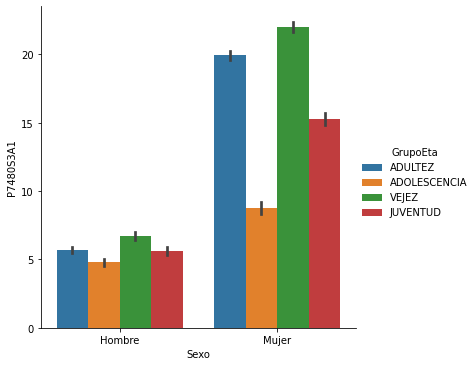

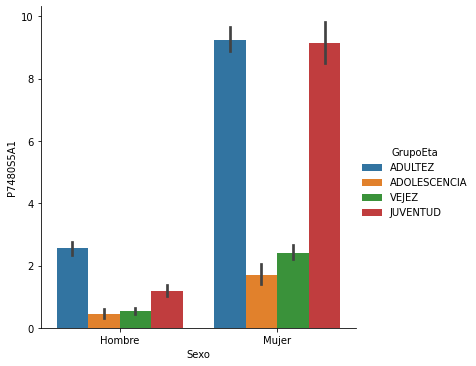

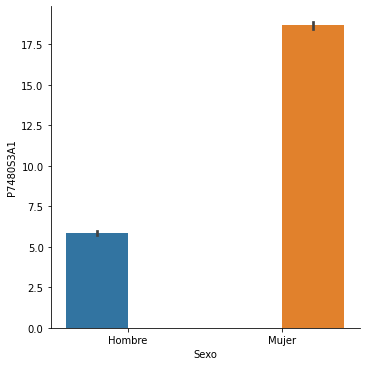

In [42]:
#Labores Hogar Noviembre 2020
sns.catplot(x="Sexo", y="P7480S3A1", hue="GrupoEta", kind="bar", data=df_2020)

# Cuidado Infantes 
sns.catplot(x="Sexo", y="P7480S5A1", hue="GrupoEta", kind="bar", data=df_2020)

#Cuidado Infates por Sexo
sns.catplot(x="Sexo", y="P7480S3A1", hue="Sexo", kind="bar", data=df_2020)

In [45]:
#Post Pandemia
print(df_2020.groupby('Sexo')['P7480S3A1'].mean())
print('Cuidado Infantes 2020',df_2020.groupby('Sexo')['P7480S5A1'].mean())

Sexo
Hombre     5.860752
Mujer     18.684214
Name: P7480S3A1, dtype: float64
Cuidado Infantes 2020 Sexo
Hombre    1.411854
Mujer     5.968145
Name: P7480S5A1, dtype: float64


<AxesSubplot:xlabel='Sexo', ylabel='P7480S3A1'>

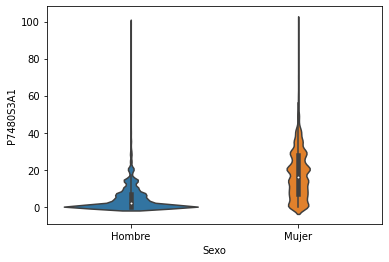

In [14]:
sns.violinplot(x=df_2019.Sexo, y=df_2019.P7480S3A1)

<AxesSubplot:xlabel='Sexo', ylabel='P7480S3A1'>

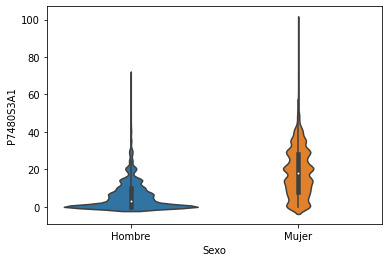

In [15]:
sns.violinplot(x=df_2020.Sexo, y=df_2020.P7480S3A1)